In [249]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb

In [250]:
# Load the datasets
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [251]:
# # drop ID , dwelling , age , Employement length 
# train_data = train_data.drop(['ID','Dwelling','Age','Employment length'], axis=1)
# test_data = test_data.drop(['ID','Dwelling','Age','Employment length'], axis=1)


In [252]:
train_data.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [253]:
# 1. Exploratory Data Analysis (EDA)
print(train_data.describe())

                 ID  Children count        Income           Age  \
count  2.916500e+04    29165.000000  2.916500e+04  29165.000000   
mean   5.078232e+06        0.430790  1.868904e+05 -15979.477490   
std    4.182400e+04        0.741882  1.014096e+05   4202.997485   
min    5.008804e+06        0.000000  2.700000e+04 -25152.000000   
25%    5.042047e+06        0.000000  1.215000e+05 -19444.000000   
50%    5.074666e+06        0.000000  1.575000e+05 -15565.000000   
75%    5.114629e+06        1.000000  2.250000e+05 -12475.000000   
max    5.150485e+06       19.000000  1.575000e+06  -7705.000000   

       Employment length  Has a mobile phone  Has a work phone   Has a phone  \
count       29165.000000             29165.0      29165.000000  29165.000000   
mean        59257.761255                 1.0          0.224310      0.294977   
std        137655.883458                 0.0          0.417134      0.456040   
min        -15713.000000                 1.0          0.000000      0.000000

In [254]:
train_data.columns

Index(['ID', 'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email', 'Job title',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

In [255]:
train_data.isnull().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



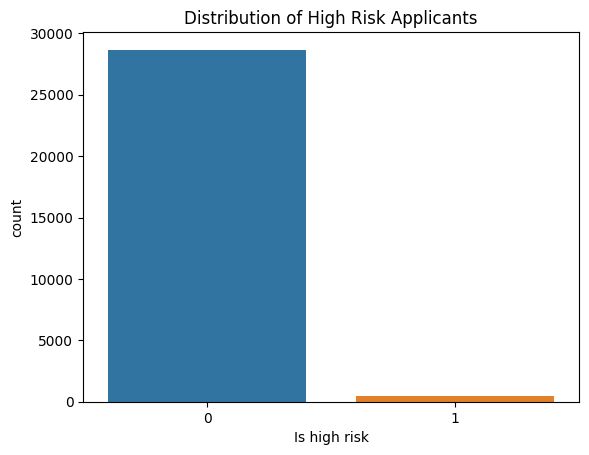

In [256]:
# Visualize distribution of target variable
sns.countplot(x='Is high risk', data=train_data)
plt.title('Distribution of High Risk Applicants')
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap')

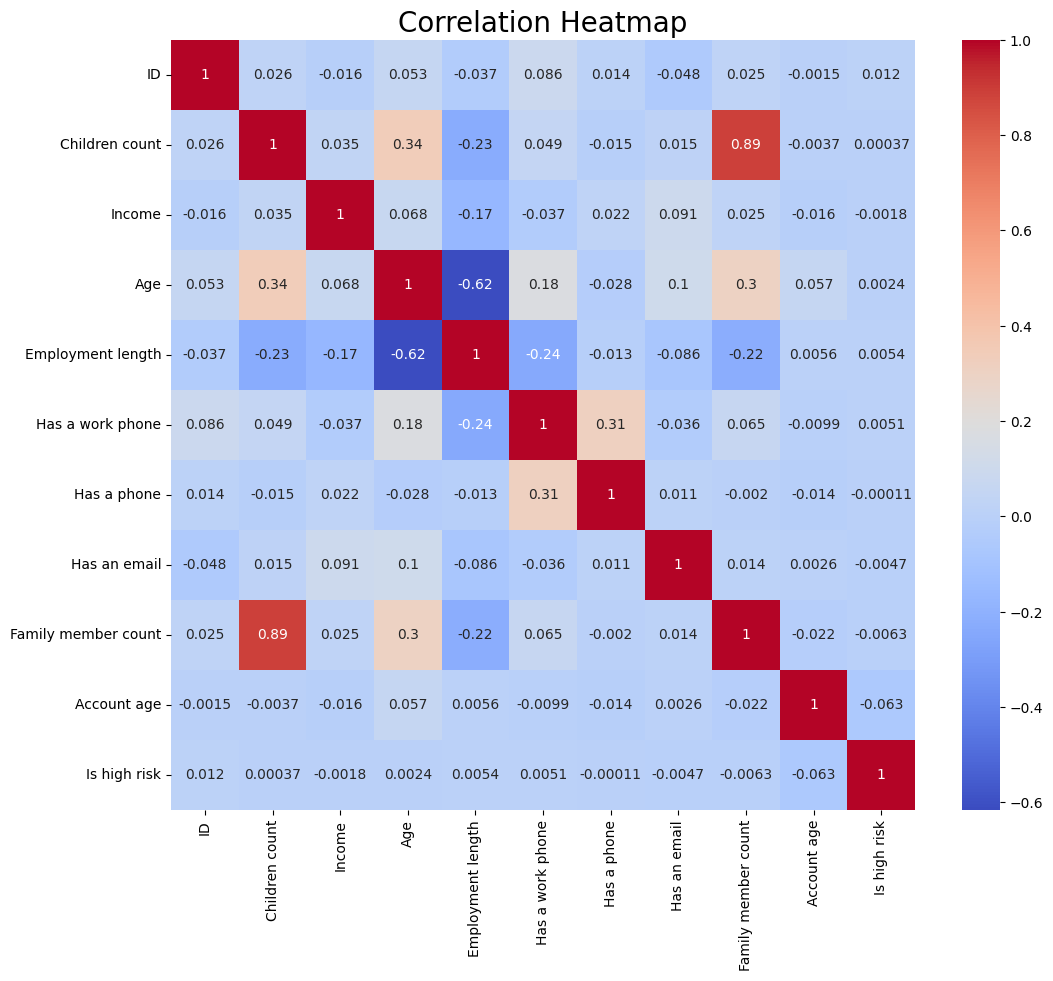

In [257]:
# Select only numeric columns and drop 'Has a mobile phone'

numeric_cols = train_data.select_dtypes(include=[np.number]).drop(columns='Has a mobile phone')

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Create a larger figure
plt.figure(figsize=(12, 10))

# Plot the heatmap with larger annotations
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={"size": 10})

# Set a title
plt.title('Correlation Heatmap', fontsize=20)

In [258]:
# print all numerical columns
print(numeric_cols.columns)


Index(['ID', 'Children count', 'Income', 'Age', 'Employment length',
       'Has a work phone', 'Has a phone', 'Has an email',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')


In [259]:

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Load your dataset (replace 'your_dataset.csv' with the actual file path)

# 4. Handling categorical variables
categorical_columns = ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level', 'Marital status', 'Dwelling',  'Job title']

for column in categorical_columns:
    encoder = LabelEncoder()
    train_data[column] = encoder.fit_transform(train_data[column])

# 5. Normalization/Scaling
# Assuming 'Income', 'Children count', 'Family member count' are numerical
numerical_columns = ['ID', 'Children count', 'Income', 'Age', 'Employment length',
       'Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email',
       'Family member count', 'Account age', 'Is high risk']
scaler = MinMaxScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

# 6. Handling missing values
# Assuming 'Job title' has missing values
imputer = SimpleImputer(strategy='most_frequent')
train_data['Job title'] = imputer.fit_transform(train_data[['Job title']])


In [260]:
train_data.duplicated().sum()

0

In [261]:
# correlation matrix of train_data
correlation_matrix = train_data.corr()
correlation_matrix['Is high risk'].sort_values(ascending=False)




Is high risk           1.000000
Marital status         0.022375
Gender                 0.016015
ID                     0.011941
Employment length      0.005398
Has a work phone       0.005115
Age                    0.002422
Dwelling               0.001669
Children count         0.000369
Has a phone           -0.000112
Income                -0.001760
Education level       -0.002078
Employment status     -0.003265
Has a car             -0.003728
Has an email          -0.004659
Job title             -0.005565
Family member count   -0.006252
Has a property        -0.025659
Account age           -0.063273
Has a mobile phone          NaN
Name: Is high risk, dtype: float64

In [262]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# 4. Handling categorical variables
categorical_columns = ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level', 'Marital status', 'Dwelling',  'Job title']

for column in categorical_columns:
    encoder = LabelEncoder()
    test_data[column] = encoder.fit_transform(test_data[column])

# 5. Normalization/Scaling
# Assuming 'Income', 'Children count', 'Family member count' are numerical
numerical_columns = ['ID', 'Children count', 'Income', 'Age', 'Employment length',
       'Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email',
       'Family member count', 'Account age', 'Is high risk']
scaler = MinMaxScaler()
test_data[numerical_columns] = scaler.fit_transform(test_data[numerical_columns])

# 6. Handling missing values
# Assuming 'Job title' has missing values
imputer = SimpleImputer(strategy='most_frequent')
test_data['Job title'] = imputer.fit_transform(test_data[['Job title']])


In [263]:
# # parallel coordinates plot
# import plotly.express as px

# # Assuming 'df' is your DataFrame and 'target' is the name of your target column
# fig = px.parallel_coordinates(train_data, color='Is high risk', color_continuous_scale=px.colors.sequential.Blues)

# fig.show()


In [264]:
# import plotly.express as px

# # Assuming 'train_data' is your DataFrame
# fig=px.parallel_categories(train_data)
# fig.show()


In [265]:
test_data.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,0.581968,0,0,1,0.0,0.113372,2,4,2,1,0.470928,0.036673,0.0,0.0,0.0,0.0,11,0.000000,0.900000,0.0
1,0.622214,1,1,0,0.0,0.418605,0,1,1,1,0.397781,0.038627,0.0,0.0,1.0,0.0,10,0.071429,0.733333,0.0
2,0.558104,0,0,0,0.0,0.133721,2,1,0,1,0.180320,0.027424,0.0,0.0,0.0,1.0,3,0.071429,0.133333,0.0
3,0.092746,0,1,1,0.0,0.270349,0,1,1,1,0.717602,0.039918,0.0,0.0,0.0,0.0,10,0.071429,0.100000,0.0
4,0.683917,0,1,0,0.0,0.127907,4,4,1,2,0.735832,0.039364,0.0,0.0,0.0,0.0,8,0.071429,0.200000,0.0


In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming train_data is your DataFrame and 'target' is the name of the column you're trying to predict
# X = train_data.drop('Is high risk', axis=1)
X = train_data.drop('Is high risk', axis=1)
# X = train_data
y = train_data['Is high risk']

# Assuming X is your feature matrix and y is the target vector
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X
y_train = y
X_test = test_data.drop('Is high risk', axis=1)
y_test = test_data['Is high risk']

# Initialize the models
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier()
grad_boost = GradientBoostingClassifier()

# List of models
models = [log_reg, dec_tree, rand_forest, grad_boost]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Accuracy: {accuracy_score(y_test, y_pred)}")

LogisticRegression Accuracy: 0.9839550191991223
DecisionTreeClassifier Accuracy: 0.9692814042786615
RandomForestClassifier Accuracy: 0.9829950630828305
GradientBoostingClassifier Accuracy: 0.9828579264947888


In [268]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

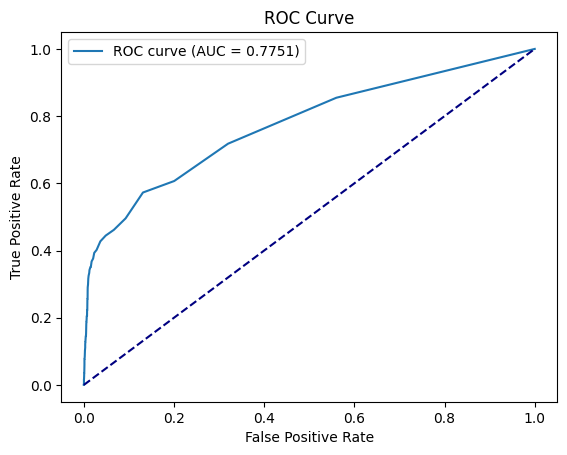

In [269]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [270]:
# print the classification report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      7175
         1.0       0.40      0.03      0.06       117

    accuracy                           0.98      7292
   macro avg       0.69      0.52      0.53      7292
weighted avg       0.98      0.98      0.98      7292



In [271]:
# print the confusion matrix
print(confusion_matrix(y_test, y_pred))


[[7169    6]
 [ 113    4]]


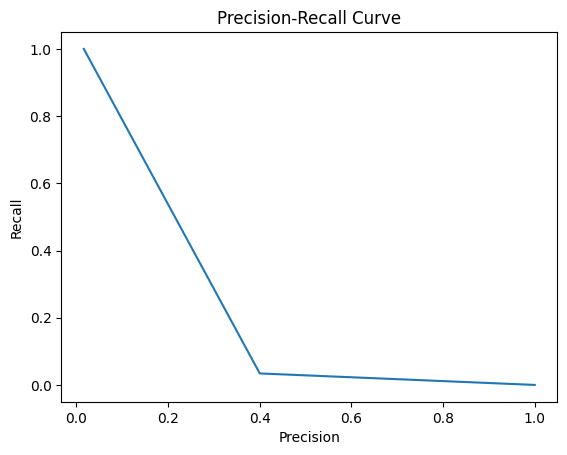

In [272]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.show()


In [273]:
# prection on test data 
test_data = pd.read_csv('test_data.csv')
test_data.head()



,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0


In [274]:
# handeling categorical variables
categorical_columns = ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level', 'Marital status', 'Dwelling',  'Job title']

for column in categorical_columns:
    encoder = LabelEncoder()
    train_data[column] = encoder.fit_transform(train_data[column])



In [275]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.metrics import precision_score

# Load the model
model = joblib.load('model.pkl')  # Replace with your model's path

# Load the training data (or use the data used during training)
train_data = pd.read_csv('train_data.csv')  # Replace with your training data's path

# Extract the feature names from the training data columns
feature_names = train_data.drop('Is high risk', axis=1).columns

# Load the test data
test_data = pd.read_csv('test_data.csv')  # Replace with your test data's path

# Preprocess test data (ensure consistency with training data)
categorical_cols = test_data.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns
for column in categorical_cols:
    test_data[column] = encoder.fit_transform(test_data[column])

# Ensure consistency in feature order
if set(feature_names) != set(test_data.drop('Is high risk', axis=1).columns):
    print("Feature mismatch between training and test data:")
    print("Features in the model:", feature_names)
    print("Features in the test data:", test_data.drop('Is high risk', axis=1).columns)

# Make predictions
predictions = model.predict(test_data.drop('Is high risk', axis=1))

# Display predictions
print("Predictions:")
print(predictions)

print(precision_score(y_test, y_pred))

Predictions:
[0 0 0 ... 0 0 0]
0.4


In [276]:
# Save predictions to a CSV file
predictions_df = pd.DataFrame(predictions, columns=['Predicted_Is_High_Risk'])
predictions_df.to_csv('predictions.csv', index=False)


In [277]:
# pkl file using pickle
import pickle
# Save the model as a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model from a pickle file
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions using the loaded model
loaded_predictions = loaded_model.predict(X_test)
print(loaded_predictions)



[0 0 0 ... 0 0 0]


In [278]:
train_data['Is high risk'].value_counts()

Is high risk
0    28666
1      499
Name: count, dtype: int64

In [279]:
test_data['Is high risk'].value_counts()

Is high risk
0    7175
1     117
Name: count, dtype: int64

In [280]:
predictions_df['Predicted_Is_High_Risk'].value_counts()

Predicted_Is_High_Risk
0    7289
1       3
Name: count, dtype: int64